In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import drawSS

%matplotlib inline
pd.set_option('display.max_rows', 10)

In [2]:
#%% to update files, run following script
# %run ./copyRLFiles.ipynb

In [44]:
#%% load all files from the folder and summarized in data_all
folder = 'data'
files = [f for f in os.listdir('data') if 'rlt.csv' in f]

data_all = {}
for file in files:
    print(file)
    file_set= {'rlt': os.path.join(folder, file), 
                'name': file[:6], 
                'crv': os.path.join(folder, file[:len(file)-7] + 'crv.csv'),
                'set': os.path.join(folder, file[:len(file)-7] + 'set.csv'),}
    data = drawSS.thinningSS(file_set)
    data_all[data.name] = data.to_dict()
data_all = pd.DataFrame(data_all)
data_all

RL7929--1K-20180607154847_rlt.csv
RL7786--1K-20180517104349_rlt.csv
RL7797--1K-20180525135150_rlt.csv
RL7785--1K-20180517102718_rlt.csv
RL7928--1K-20180607153125_rlt.csv


,RL7785,RL7786,RL7797,RL7928,RL7929
0.0,0.062847,0.069231,0.066509,0.071973,0.071884
0.1,10.310726,10.624817,14.618188,10.166107,9.319359
0.2,20.466567,20.856029,29.994362,21.069570,19.253004
0.3,29.523915,30.067564,44.396392,31.435792,28.844620
0.4,37.765505,38.380989,57.684690,41.202831,37.965686
...,...,...,...,...,...
9.5,NaN,NaN,NaN,NaN,NaN
9.6,NaN,NaN,NaN,NaN,NaN
9.7,NaN,NaN,NaN,NaN,NaN
9.8,NaN,NaN,NaN,NaN,NaN


In [59]:
#%% regularize data by strain at REGULARIZE_STRAIN
regularize_strain = 0.4
data_reg = data_all/data_all.loc[regularize_strain] * regularize_strain

<Figure size 432x288 with 0 Axes>

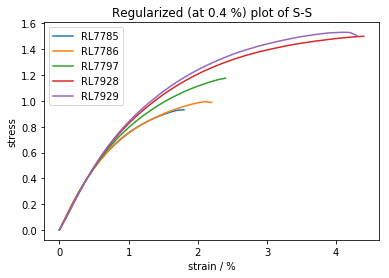

In [60]:
#%% plot all regularized data
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
ax = data_reg.plot()
#ax.plot(data_skipped['strain'], data_skipped['stress'], marker='+', label='Extracted')
#ax.plot(data['strain'], data['stress'], label='Raw data')
ax.set_xlabel('strain / %')
ax.set_ylabel('stress')
ax.set_title('Regularized (at ' + str(regularize_strain) + ' %) plot of S-S')
ax.legend(loc='best')
plt.show()